#### Given this file, can you create a cumulative distribution chart of the total years worked across all employees surveyed? You can exclude values that indicate the employee did not state his/her start or end date.

In [1]:
#Some notes:
#Cleaning Cease date will help you convert the Cease Date into a standard format              
#Total years worked = Cease Date Year - DETE Start Date Year

In [2]:
#Importing packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In C:\Users\Neema MV\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Neema MV\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Neema MV\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Neema MV\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Neema MV\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [38]:
#reading csv into a dataframe
exit_survey = pd.read_csv('C:/Users/Neema MV/Downloads/DDI Dataset - Exit Information - dete-exit-survey-january-2014.csv', index_col=False)

#viewing dataframe
exit_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
exit_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 57 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [40]:
exit_survey['cease_date_cleaned'] = np.where((len(exit_survey['Cease Date']) > 4) & (exit_survey['Cease Date'] != 'Not Stated'), exit_survey['Cease Date'].str[-4:],  exit_survey['Cease Date'])

In [12]:
exit_survey['cease_date_cleaned']=='Not Stated'

0      False
1      False
2      False
3      False
4      False
       ...  
817    False
818    False
819    False
820    False
821    False
Name: cease_date_cleaned, Length: 822, dtype: bool

In [27]:
#create a df with only columns required
clean_df = exit_survey[['ID','cease_date_cleaned','DETE Start Date']]




In [41]:
exit_survey = exit_survey[(exit_survey['cease_date_cleaned'] != 'Not Stated') & (exit_survey['DETE Start Date'] != 'Not Stated')]

In [42]:
exit_survey['total_years'] = exit_survey['cease_date_cleaned'].astype('int64')- exit_survey['DETE Start Date'].astype('int64')

C:\Users\Neema MV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
exit_survey['total_years']

0      28
2       1
3       7
4      42
5      18
       ..
816     2
817    37
818    34
819     5
820    12
Name: total_years, Length: 719, dtype: int64

<AxesSubplot:>

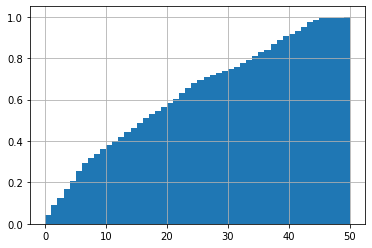

In [43]:
exit_survey['total_years'].hist(cumulative=True, density=1, bins=100)